# Assignment Customer Satisfaction and Sentiment Analysis


## Objective

You are a data analyst of a consulting company that provides customer insight regarding multiple ticketing system, such as JIRA and Zoho Desk. Your team gather surveys to customers regarding their ticketing system's performance. Your role in the team is to gather reports regarding customer satisfaction and sentiment analysis into a single dashboard and present your insight.

Analyze the following metrics and other insight you can find in the dataset:

- Survey response rate
- Customer Satisfaction score (CSAT)
- Customer Effort Score (CES)
- Net Promoter Score (NPS)
- Sentiment Analysis



## Data Preparation

In [1]:
import numpy as np
import pandas as pd
import os

pd.options.display.max_columns = 999
pd.options.display.float_format = "{:.2f}".format

### Access to Drive

Write where you put the data in google drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

# Where is your data_path


Mounted at /content/drive/


### Read Data

Read the file **assignment_ticket_system_review.csv**

In [3]:
# Read Data
path = '/content/drive/MyDrive/assignment_ticket_system_review.csv'
df = pd.read_csv(path)
df.head()

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text
0,T_02161,2024-11-20,Zendesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T_00229,2024-10-06,Zendesk,3.00,4.00,3.00,3.00,2.00,6.00,Customer tickets managements
2,T_04527,2024-12-26,Zoho Desk,5.00,5.00,5.00,5.00,5.00,8.00,"After 6 months of using the Zoho desk, we shif..."
3,T_03190,2024-12-08,Zoho Desk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T_00644,2024-10-17,Zendesk,5.00,3.00,4.00,5.00,5.00,6.00,Pros:Zendesk has always been one of the go-to ...


The following is the dictionary for the data, survey is only valid if all of the survey questions and text review is not blank (null):

**General Information**
- id_survey: identifier for each survey
- date_of_survey: date of survey taken
- ticket_system: The name of the ticket system being reviewed (e.g. Zoho Desk)

**Survey Questions**
- overall_rating: The overall satisfaction rating given by the reviewer, ranging from 1 to 5
- customer_service: The satisfaction rating for the customer service provided by the ticket system, ranging from 1 to 5.
- features: The satisfaction rating for the features of the ticket system, ranging from 1 to 5
- value_for_money: The satisfaction rating for the value for money provided by the ticket system, ranging from 1 to 5
- ease_of_use: The rating for how easy the ticket system is to use, ranging from 1 to 5
- likelihood_to_recommend: The likelihood that the reviewer would recommend the ticket system to others, ranging from 1 to 10
- overall_text: The full text of the overall review, providing detailed feedback on the ticket system.


In [4]:

# Check the type of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_survey                1462 non-null   object 
 1   date_of_survey           1462 non-null   object 
 2   ticket_system            1462 non-null   object 
 3   overall_rating           787 non-null    float64
 4   customer_service         787 non-null    float64
 5   features                 787 non-null    float64
 6   value_for_money          787 non-null    float64
 7   ease_of_use              787 non-null    float64
 8   likelihood_to_recommend  787 non-null    float64
 9   overall_text             787 non-null    object 
dtypes: float64(6), object(4)
memory usage: 114.3+ KB


In [13]:
df[df['likelihood_to_recommend'] == 0]

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text
859,T_01365,2024-11-05,Freshdesk,2.00,0.00,2.00,2.00,3.00,0.00,"Freshdesk in general is ok to work with, it do..."
1380,T_04452,2024-12-25,Zoho Desk,2.00,2.00,1.00,2.00,1.00,0.00,I no longer use this desk.It has a huge learni...


### Data Cleansing

Convert the date column into proper date_time format.

In [ ]:
# Convert data type
df['date_of_survey'] = pd.to_datetime(df['date_of_survey'])
df['date_of_survey'].info()
display(df[['id_survey', 'date_of_survey']].head())

<class 'pandas.core.series.Series'>
RangeIndex: 1462 entries, 0 to 1461
Series name: date_of_survey
Non-Null Count  Dtype         
--------------  -----         
1462 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 11.6 KB


,id_survey,date_of_survey
0,T_02161,2024-11-20
1,T_00229,2024-10-06
2,T_04527,2024-12-26
3,T_03190,2024-12-08
4,T_00644,2024-10-17


In [14]:
# Ganti semua nilai -1 dan 0 menjadi NaN di seluruh kolom
df.replace([-1, 0], np.nan, inplace=True)

# Verifikasi: cek apakah masih ada nilai -1 atau 0
print(df.isin([-1, 0]).any())

id_survey                  False
date_of_survey             False
ticket_system              False
overall_rating             False
customer_service           False
features                   False
value_for_money            False
ease_of_use                False
likelihood_to_recommend    False
overall_text               False
dtype: bool


## Survey Analysis

### Response Rate

Start by analyzing how many customers has filled the survey, indicated by whether the overall_rating is not blank.

In [20]:
# How many customer responded to the survey?
df['overall_rating'].notna().sum()
print(f"Jumlah pelanggan yang mengisi survei (overall_rating tidak kosong): {df['overall_rating'].notna().sum()}")

Jumlah pelanggan yang mengisi survei (overall_rating tidak kosong): 787


Create a new dataframe that consists only of those who have responded the survey to simplify calculating the CSAT, CES, and NPS Score.

In [ ]:
# Responded Customer
kolom_survei = ['overall_rating',
                  'customer_service',
                  'features', 'value_for_money',
                  'ease_of_use',
                  'likelihood_to_recommend',
                  'overall_text'
]
df_survei = df.dropna(subset=kolom_survei).copy()
df_survei.info()

<class 'pandas.core.frame.DataFrame'>
Index: 787 entries, 1 to 1461
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id_survey                787 non-null    object        
 1   date_of_survey           787 non-null    datetime64[ns]
 2   ticket_system            787 non-null    object        
 3   overall_rating           787 non-null    float64       
 4   customer_service         787 non-null    float64       
 5   features                 787 non-null    float64       
 6   value_for_money          787 non-null    float64       
 7   ease_of_use              787 non-null    float64       
 8   likelihood_to_recommend  787 non-null    float64       
 9   overall_text             787 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 67.6+ KB


### CSAT Score

Measure the customer's overall satisfaction score (CSAT) with the following formula:

$$
CSAT = \frac{\Sigma\ total\ satisfaction\ score}{number\ of\ responded\ customer \times \max\ rating}
$$

The max rating is inserted to convert the CSAT score into percentage.

CSAT score can be classified into categories based on the result. There is no absolute threshold for each categories but the following is the common threshold:

- \>= 90%: Excellent
- 75%-90%: Good
- 60-75%: Fair
- \<60%: Poor

Measure the satisfaction score for the following attributes:

- customer service
- features
- value for money

In [22]:

# Kolom yang akan dihitung CSAT-nya
kolom_csat = ['customer_service', 'features', 'value_for_money']

# Skor maksimum (karena skala 1–5)
max_rating = 5

# Buat dictionary untuk menyimpan hasil
csat_result = {}

# Loop setiap kolom untuk hitung CSAT
for col in kolom_csat:
    # Total skor kepuasan per kolom (abaikan NaN)
    total_score = df[col].sum()
    # Jumlah responden yang mengisi kolom tersebut
    responded_customer = df[col].notna().sum()
    # Hitung CSAT %
    csat_percent = (total_score / (responded_customer * max_rating)) * 100

    # Klasifikasi kategori
    if csat_percent >= 90:
        category = "Excellent"
    elif csat_percent >= 75:
        category = "Good"
    elif csat_percent >= 60:
        category = "Fair"
    else:
        category = "Poor"

    # Simpan hasil
    csat_result[col] = {
        'Total Score': total_score,
        'Responded Customers': responded_customer,
        'CSAT (%)': csat_percent,
        'Category': category
    }

# Ubah hasil ke DataFrame agar mudah dibaca
df_csat = pd.DataFrame(csat_result).T


display(df_csat)


,Total Score,Responded Customers,CSAT (%),Category
customer_service,2652.00,770,68.88,Fair
features,3476.00,787,88.34,Good
value_for_money,3447.00,787,87.60,Good


insight:
- karena dikolom customer service nilai nannya lebih banyak daripada kolom yang lain

### CES Score

Measure CES with the following formula


$$
CES = \frac{\Sigma\ total\ effort\ score}{number\ of\ responded\ customer \times \max\ rating}
$$

In [23]:
# CES Score
# Skala maksimum (misalnya 5)
max_rating = 5

# Total skor effort
total_effort_score = df['ease_of_use'].sum()

# Jumlah responden yang menjawab kolom tersebut
responded_customer = df['ease_of_use'].notna().sum()

# Hitung CES
ces_score = (total_effort_score / (responded_customer * max_rating))
# hitung CES %
ces_percent = ces_score * 100

print("=== CES Score ===")
print(f"Total Effort Score       : {total_effort_score}")
print(f"Responded Customers      : {responded_customer}")
print(f"CES Score                : {ces_score}")
print(f"CES Score   (%)          : {ces_percent:.2f}% ")

=== CES Score ===
Total Effort Score       : 3521.0
Responded Customers      : 787
CES Score                : 0.8947903430749682
CES Score   (%)          : 89.48% 


### NPS Score

To calculate the NPS score, first we must convert the **would_you_recommend** column into proper NPS Category based on the rating value:

* Promoter: Rating 9-10
* Passive: Rating 7-8
* Detractor: Rating < 7

In [40]:
resp_like = df.dropna(subset=['likelihood_to_recommend']).copy()
resp_like.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 1 to 1461
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_survey                784 non-null    object 
 1   date_of_survey           784 non-null    object 
 2   ticket_system            784 non-null    object 
 3   overall_rating           784 non-null    float64
 4   customer_service         769 non-null    float64
 5   features                 784 non-null    float64
 6   value_for_money          784 non-null    float64
 7   ease_of_use              784 non-null    float64
 8   likelihood_to_recommend  784 non-null    float64
 9   overall_text             784 non-null    object 
 10  nps_category             784 non-null    object 
dtypes: float64(6), object(5)
memory usage: 73.5+ KB


In [41]:


# Category NPS
def categorize_nps(score):
    if score >= 9:
        return 'Promoter'
    elif score >= 7:
        return 'Passive'
    else:
        return 'Detractor'

df['nps_category'] = resp_like['likelihood_to_recommend'].apply(categorize_nps)

# Tampilkan hasil kategori dan jumlahnya
print(df['nps_category'].value_counts())


nps_category
Passive      379
Promoter     251
Detractor    154
Name: count, dtype: int64



Calculate the NPS Score with the following formula

$$
NPS = \frac{Promoter - Detractor}{Total\ Survey\ Responded}
$$

In [42]:
# NPS Score
# Hitung jumlah tiap kategori
promoter = (df['nps_category'] == 'Promoter').sum()
detractor = (df['nps_category'] == 'Detractor').sum()
total_responded = df['nps_category'].notna().sum()

# Rumus NPS
nps_score = ((promoter - detractor) / total_responded)

# Kategori NPS
if nps_score >= 70:
    nps_label = "Excellent"
elif nps_score >= 50:
    nps_label = "Very Good"
elif nps_score >= 30:
    nps_label = "Good"
elif nps_score >= 0:
    nps_label = "Average"
else:
    nps_label = "Poor"

print("\n=== NPS Score ===")
print(f"Promoters  : {promoter}")
print(f"Detractors : {detractor}")
print(f"Total Resp.: {total_responded}")
print(f"NPS        : {nps_score} → {nps_label}")



=== NPS Score ===
Promoters  : 251
Detractors : 154
Total Resp.: 784
NPS        : 0.12372448979591837 → Average


NPS score can be ranging from -100 (when all customers are detractor) to 100 (when all customers are promoter).

NPS Score can be classified into categories based on the following threshold:

- \>= 70: Excellent
- 50-69: Very Good
- 30-49: Good
- 0-29: Average
- \< 0: Poor

## Sentiment Analysis

Create a new dataframe with no blank overall_text.

In [43]:
# Create new dataframe
df_sentiment = df.dropna(subset=['overall_text']).copy()
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 787 entries, 1 to 1461
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_survey                787 non-null    object 
 1   date_of_survey           787 non-null    object 
 2   ticket_system            787 non-null    object 
 3   overall_rating           787 non-null    float64
 4   customer_service         770 non-null    float64
 5   features                 787 non-null    float64
 6   value_for_money          787 non-null    float64
 7   ease_of_use              787 non-null    float64
 8   likelihood_to_recommend  784 non-null    float64
 9   overall_text             787 non-null    object 
 10  nps_category             784 non-null    object 
dtypes: float64(6), object(5)
memory usage: 73.8+ KB


In [45]:
# Create new dataframe
df_sentiment = df[df['overall_text'].notna() & (df['overall_text'].str.strip() != '')]

# Tampilkan jumlah data yang tersisa
print("Jumlah data dengan teks ulasan:", len(df_sentiment))


Jumlah data dengan teks ulasan: 787


### Text Cleansing

In order to get more accurate sentiment, several text cleansing need to be done. However, in most of recent sentiment analysis models and algorithm, the only text cleansing needed are as follows:

* Clean double whitespace
* Clean URL/website
* Clean username (mostly in social media or digital text)

In [46]:
import re
import string

def cleansing_text(x):
  # ubah semua huruf menjadi lowercase
  out_text = x.lower()

  # clean double whitespace
  out_text = ' '.join(out_text.split())

  # clean url
  out_text = re.sub(r"http\S+|www\S+|https\S+", 'http', out_text)

  # clean username
  out_text = re.sub(r"@\S+", '@user', out_text)

  # hapus tanda baca
  out_text = out_text.translate(str.maketrans('', '', string.punctuation))

  return(out_text)

cleansing_text(" Doesn't  dissapoint. The car       was great. It was the best car rental experiences I've had! Salute to @jone who recommend https:/rental.com")

'doesnt dissapoint the car was great it was the best car rental experiences ive had salute to user who recommend http'

In [47]:
# apply cleansing to review
df_sentiment['clean_text'] = df_sentiment['overall_text'].apply(cleansing_text)
df_sentiment['clean_text']

/tmp/ipython-input-3118662121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['clean_text'] = df_sentiment['overall_text'].apply(cleansing_text)


,clean_text
1,customer tickets managements
2,after 6 months of using the zoho desk we shift...
4,proszendesk has always been one of the goto so...
6,it has been very useful so far to integrate mu...
8,prosits easy to use and very intuitivewe have ...
...,...
1457,it was not prioritizing tracking resolving and...
1458,very useful onestop solution with related to i...
1459,we have done quite well we have already more t...
1460,immensely positive highly recommended customer...


### sentiment analysis


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [49]:
# Daftar kata positif dan negatif sederhana
positive_words = ['good', 'great', 'excellent', 'amazing', 'love', 'satisfied', 'happy', 'best', 'recommend']
negative_words = ['bad', 'terrible', 'poor', 'disappointed', 'worst', 'hate', 'problem', 'awful']

def manual_sentiment_score(text):
    score = 0
    for word in text.split():
        if word in positive_words:
            score += 1
        elif word in negative_words:
            score -= 1
    return score

df_sentiment['sentiment_score'] = df_sentiment['clean_text'].apply(manual_sentiment_score)

/tmp/ipython-input-4004400423.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['sentiment_score'] = df_sentiment['clean_text'].apply(manual_sentiment_score)


In [50]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df_sentiment['clean_text'])
y = df_sentiment['sentiment_score']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [52]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


R² Score: 0.6738
Mean Squared Error: 0.2380


In [53]:
def classify_sentiment(score):
    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Negatif'
    else:
        return 'Netral'

df_sentiment['sentiment_label'] = df_sentiment['sentiment_score'].apply(classify_sentiment)
df_sentiment['sentiment_label']

/tmp/ipython-input-4217104449.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['sentiment_label'] = df_sentiment['sentiment_score'].apply(classify_sentiment)


,sentiment_label
1,Netral
2,Positif
4,Netral
6,Netral
8,Netral
...,...
1457,Netral
1458,Netral
1459,Positif
1460,Netral


In [54]:
sentiment_dist = df_sentiment['sentiment_label'].value_counts(normalize=True) * 100
print("Distribusi Sentimen (%):\n", sentiment_dist)

Distribusi Sentimen (%):
 sentiment_label
Netral    63.02
Positif   35.58
Negatif    1.40
Name: proportion, dtype: float64


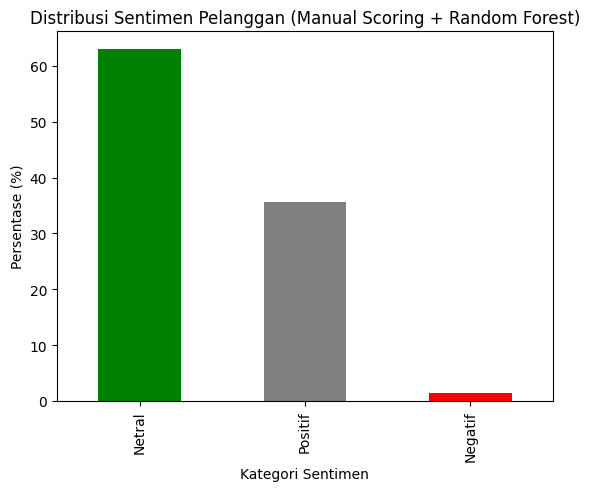

In [55]:
import matplotlib.pyplot as plt

sentiment_dist.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Distribusi Sentimen Pelanggan (Manual Scoring + Random Forest)')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Persentase (%)')
plt.show()


### Sentiment Analysis by textblob

Create a sentiment categories using algorithm of your own choice.

In [57]:
# textblob
from textblob import TextBlob
def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

df_sentiment['sentiment_textblob'] = df_sentiment['clean_text'].apply(get_sentiment_polarity)
df_sentiment[['clean_text', 'sentiment_textblob']].head()


/tmp/ipython-input-3072709218.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['sentiment_textblob'] = df_sentiment['clean_text'].apply(get_sentiment_polarity)


,clean_text,sentiment_textblob
1,customer tickets managements,0.00
2,after 6 months of using the zoho desk we shift...,0.40
4,proszendesk has always been one of the goto so...,0.19
6,it has been very useful so far to integrate mu...,0.12
8,prosits easy to use and very intuitivewe have ...,0.07


In [58]:
def classify_sentiment(score):
    if score > 0:
        return 'Positif'
    elif score == 0:
        return 'Netral'
    else:
        return 'Negatif'

df_sentiment['textblob_label'] = df_sentiment['sentiment_textblob'].apply(classify_sentiment)
df_sentiment[['clean_text', 'sentiment_textblob', 'textblob_label']].head()


/tmp/ipython-input-2017433841.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['textblob_label'] = df_sentiment['sentiment_textblob'].apply(classify_sentiment)


,clean_text,sentiment_textblob,textblob_label
1,customer tickets managements,0.00,Netral
2,after 6 months of using the zoho desk we shift...,0.40,Positif
4,proszendesk has always been one of the goto so...,0.19,Positif
6,it has been very useful so far to integrate mu...,0.12,Positif
8,prosits easy to use and very intuitivewe have ...,0.07,Positif


In [59]:
textblob_dist = df_sentiment['textblob_label'].value_counts(normalize=True) * 100
print("Distribusi Sentimen (%):")
print(textblob_dist)


Distribusi Sentimen (%):
textblob_label
Positif   80.81
Netral    14.99
Negatif    4.19
Name: proportion, dtype: float64


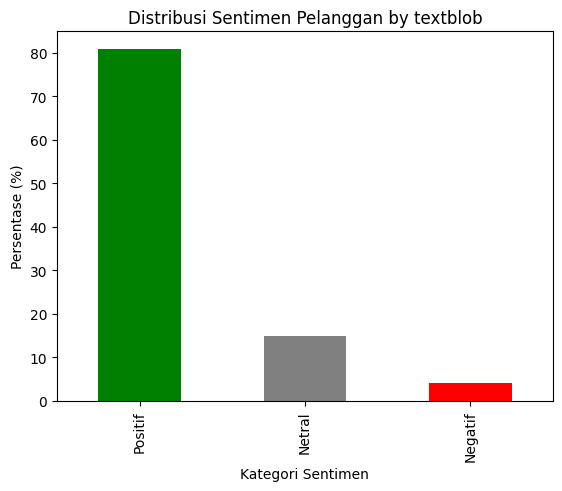

In [60]:
textblob_dist.plot(kind='bar', color=['green','gray','red'])
plt.title('Distribusi Sentimen Pelanggan by textblob')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Persentase (%)')
plt.show()

## visualisasi

/tmp/ipython-input-2617241584.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sentiment, x='textblob_label', palette='viridis', ax=axes[0])
/tmp/ipython-input-2617241584.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sentiment, x='sentiment_label', palette='viridis', ax=axes[1])


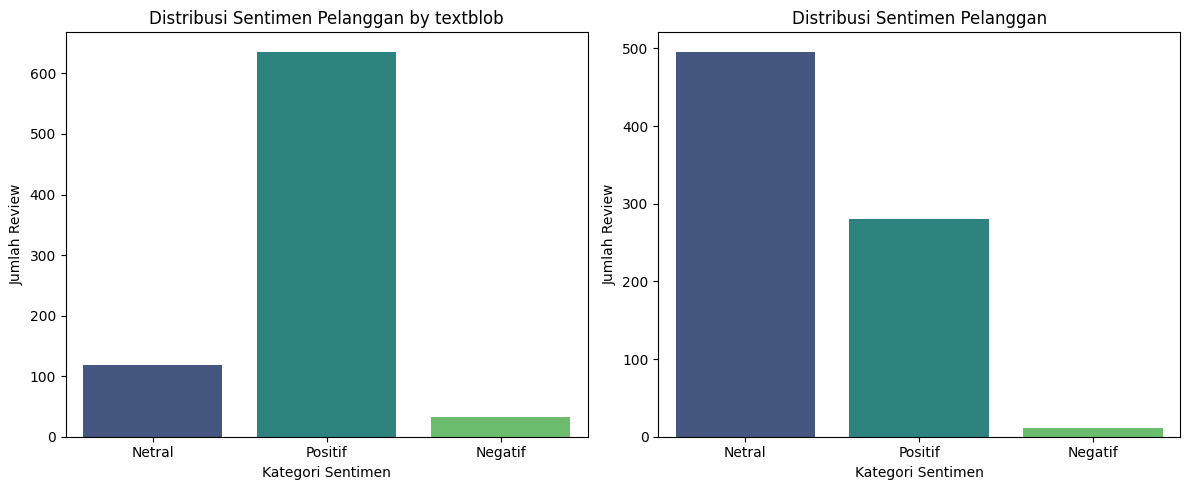

In [61]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.countplot(data=df_sentiment, x='textblob_label', palette='viridis', ax=axes[0])
axes[0].set_title('Distribusi Sentimen Pelanggan by textblob')
axes[0].set_xlabel('Kategori Sentimen')
axes[0].set_ylabel('Jumlah Review')

sns.countplot(data=df_sentiment, x='sentiment_label', palette='viridis', ax=axes[1])
axes[1].set_title('Distribusi Sentimen Pelanggan')
axes[1].set_xlabel('Kategori Sentimen')
axes[1].set_ylabel('Jumlah Review')

plt.tight_layout()
plt.show()


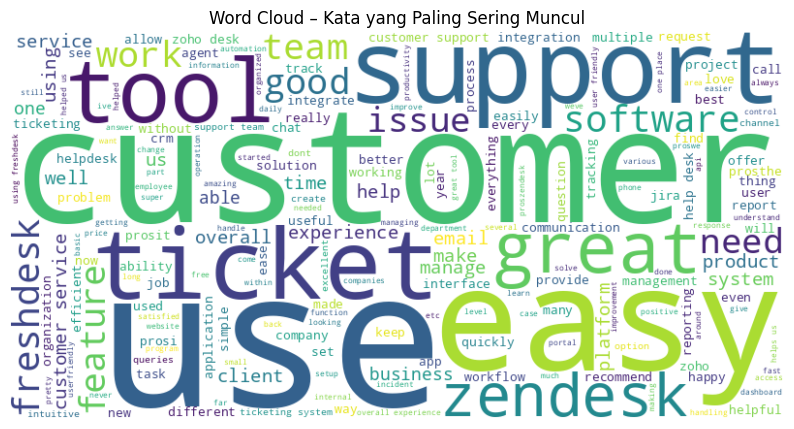

In [62]:
from wordcloud import WordCloud
all_words = ' '.join(df_sentiment['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_words)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud – Kata yang Paling Sering Muncul')
plt.show()

## Finalize Data for Reporting

Save the review data with NPS category and sentiment information to new csv for the dashboard.

In [63]:
# Save Data
df_sentiment

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text,nps_category,clean_text,sentiment_score,sentiment_label,sentiment_textblob,textblob_label
1,T_00229,2024-10-06,Zendesk,3.00,4.00,3.00,3.00,2.00,6.00,Customer tickets managements,Detractor,customer tickets managements,0,Netral,0.00,Netral
2,T_04527,2024-12-26,Zoho Desk,5.00,5.00,5.00,5.00,5.00,8.00,"After 6 months of using the Zoho desk, we shif...",Passive,after 6 months of using the zoho desk we shift...,2,Positif,0.40,Positif
4,T_00644,2024-10-17,Zendesk,5.00,3.00,4.00,5.00,5.00,6.00,Pros:Zendesk has always been one of the go-to ...,Detractor,proszendesk has always been one of the goto so...,0,Netral,0.19,Positif
6,T_04682,2024-12-28,Zoho Desk,5.00,4.00,5.00,5.00,5.00,8.00,It has been very useful so far to integrate mu...,Passive,it has been very useful so far to integrate mu...,0,Netral,0.12,Positif
8,T_01238,2024-11-02,Freshdesk,4.00,4.00,4.00,5.00,4.00,8.00,Pros:It's easy to use and very intuitive.We ha...,Passive,prosits easy to use and very intuitivewe have ...,0,Netral,0.07,Positif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,T_01536,2024-11-08,Freshdesk,5.00,4.00,4.00,5.00,5.00,8.00,"IT was not prioritizing, tracking, resolving a...",Passive,it was not prioritizing tracking resolving and...,0,Netral,0.19,Positif
1458,T_00582,2024-10-15,Jira Service Management,4.00,3.00,3.00,4.00,4.00,5.00,"Very useful, one-stop solution with related to...",Detractor,very useful onestop solution with related to i...,0,Netral,0.20,Positif
1459,T_01834,2024-11-14,Zendesk,5.00,4.00,5.00,5.00,5.00,10.00,We have done quite well. We have already more ...,Promoter,we have done quite well we have already more t...,1,Positif,0.60,Positif
1460,T_03629,2024-12-13,Zendesk,5.00,3.00,5.00,5.00,4.00,7.00,"Immensely positive, highly recommended custome...",Passive,immensely positive highly recommended customer...,0,Netral,0.19,Positif


In [64]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 787 entries, 1 to 1461
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_survey                787 non-null    object 
 1   date_of_survey           787 non-null    object 
 2   ticket_system            787 non-null    object 
 3   overall_rating           787 non-null    float64
 4   customer_service         770 non-null    float64
 5   features                 787 non-null    float64
 6   value_for_money          787 non-null    float64
 7   ease_of_use              787 non-null    float64
 8   likelihood_to_recommend  784 non-null    float64
 9   overall_text             787 non-null    object 
 10  nps_category             784 non-null    object 
 11  clean_text               787 non-null    object 
 12  sentiment_score          787 non-null    int64  
 13  sentiment_label          787 non-null    object 
 14  sentiment_textblob       787 n

In [71]:
# Simpan DataFrame ke file CSV
df_sentiment.to_csv("hasil_analisis_sentiment_final.csv", index=False)
from google.colab import files
#files.download("hasil_analisis_sentiment_final.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>